In [1]:
import os
import shutil

In [72]:
print(os.getcwd())
#os.chdir("Open_SLR_data/wav/")
print(os.getcwd())

C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt_one_word_validation
C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt_one_word_validation


In [74]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer

In [75]:
gpus = tf.config.list_physical_devices('GPU')
gpu = gpus[0]

tf.config.experimental.set_memory_growth(gpu, True)

In [76]:
# Prepare the data for a DF to match Keras tutorial

print(os.getcwd())
#C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\wav_one_word
os.chdir("C://Users//trist//PycharmProjects//AudioMNIST//Open_SLR_data//wav_one_word_16_bits")
print(os.getcwd())

wav_files = [f for f in os.listdir(os.getcwd())]
print(wav_files)


C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt_one_word_validation
C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\wav_one_word_16_bits
['F01_a1_s001_v01.wav', 'F01_a1_s001_v02.wav', 'F01_a1_s001_v03.wav', 'F01_a1_s001_v04.wav', 'F01_a1_s001_v05.wav', 'F01_a1_s001_v06.wav', 'F01_a1_s002_v01.wav', 'F01_a1_s002_v02.wav', 'F01_a1_s002_v03.wav', 'F01_a1_s002_v04.wav', 'F01_a1_s002_v05.wav', 'F01_a1_s003_v01.wav', 'F01_a1_s003_v02.wav', 'F01_a1_s003_v03.wav', 'F01_a1_s003_v04.wav', 'F01_a1_s003_v05.wav', 'F01_a1_s005_v01.wav', 'F01_a1_s005_v02.wav', 'F01_a1_s005_v03.wav', 'F01_a1_s005_v04.wav', 'F01_a1_s005_v05.wav', 'F01_a1_s006_v01.wav', 'F01_a1_s006_v02.wav', 'F01_a1_s006_v03.wav', 'F01_a1_s007_v01.wav', 'F01_a1_s007_v02.wav', 'F01_a1_s007_v03.wav', 'F01_a1_s007_v04.wav', 'F01_a1_s007_v05.wav', 'F01_a1_s014_v01.wav', 'F01_a1_s014_v02.wav', 'F01_a1_s014_v03.wav', 'F01_a1_s014_v04.wav', 'F01_a1_s015_v01.wav', 'F01_a1_s015_v02.wav', 'F01_a1_s015_v03.wav', 'F01_a1_s015_v

In [77]:
os.chdir("C://Users//trist/PycharmProjects//AudioMNIST//Open_SLR_data//txt_one_word")
print(os.getcwd())

txt_files = [f for f in os.listdir(os.getcwd())]
print(txt_files)
wav_labels = []
for txt in txt_files:
    myfile = open(txt, "rt", encoding="utf-8") # open lorem.txt for reading text
    text = myfile.read()
    text = text.replace("é","e")
    wav_labels.append(text)         # read the entire file to string
    myfile.close()                   # close the file
print(wav_labels)                  # print string contentsm

C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt_one_word
['F01_a1_s001_v01.txt', 'F01_a1_s001_v02.txt', 'F01_a1_s001_v03.txt', 'F01_a1_s001_v04.txt', 'F01_a1_s001_v05.txt', 'F01_a1_s001_v06.txt', 'F01_a1_s002_v01.txt', 'F01_a1_s002_v02.txt', 'F01_a1_s002_v03.txt', 'F01_a1_s002_v04.txt', 'F01_a1_s002_v05.txt', 'F01_a1_s003_v01.txt', 'F01_a1_s003_v02.txt', 'F01_a1_s003_v03.txt', 'F01_a1_s003_v04.txt', 'F01_a1_s003_v05.txt', 'F01_a1_s005_v01.txt', 'F01_a1_s005_v02.txt', 'F01_a1_s005_v03.txt', 'F01_a1_s005_v04.txt', 'F01_a1_s005_v05.txt', 'F01_a1_s006_v01.txt', 'F01_a1_s006_v02.txt', 'F01_a1_s006_v03.txt', 'F01_a1_s007_v01.txt', 'F01_a1_s007_v02.txt', 'F01_a1_s007_v03.txt', 'F01_a1_s007_v04.txt', 'F01_a1_s007_v05.txt', 'F01_a1_s014_v01.txt', 'F01_a1_s014_v02.txt', 'F01_a1_s014_v03.txt', 'F01_a1_s014_v04.txt', 'F01_a1_s015_v01.txt', 'F01_a1_s015_v02.txt', 'F01_a1_s015_v03.txt', 'F01_a1_s015_v04.txt', 'F01_a1_s023_v01.txt', 'F01_a1_s023_v02.txt', 'F01_a1_s023_v03.txt', 'F01_a1_s0

In [78]:
## put that in pandas DF
data_wav = {'wav': wav_files, 'labels': wav_labels}
df_one_word = pd.DataFrame(data=data_wav)
df_one_word

,wav,labels
0,F01_a1_s001_v01.wav,oui
1,F01_a1_s001_v02.wav,oui
2,F01_a1_s001_v03.wav,oui
3,F01_a1_s001_v04.wav,oui
4,F01_a1_s001_v05.wav,oui
...,...,...
3560,M19_a4_s015_v02.wav,volontiers
3561,M19_a4_s015_v03.wav,volontiers
3562,M19_a4_s023_v01.wav,evidemment
3563,M19_a4_s023_v02.wav,evidemment


In [79]:
split = int(len(df_one_word) * 0.90)
df_train = df_one_word[:split]
df_val = df_one_word[split:]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the training set: {len(df_val)}")

Size of the training set: 3208
Size of the training set: 357


In [80]:
# The set of characters accepted in the transcription.
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]
# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', ' '] (size =31)


In [81]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

wavs_path ="C://Users//trist//PycharmProjects//AudioMNIST//Open_SLR_data//wav_one_word_16_bits//"
def encode_single_sample(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wavs_path+ wav_file)
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    print(label)
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    print(label)
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    print(label)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label

In [82]:
encode_single_sample("F01_a1_s001_v01.wav", "oui")

tf.Tensor(b'oui', shape=(), dtype=string)
tf.Tensor([b'o' b'u' b'i'], shape=(3,), dtype=string)
tf.Tensor([15 21  9], shape=(3,), dtype=int64)


(<tf.Tensor: shape=(578, 193), dtype=float32, numpy=
 array([[ 8.621864  ,  7.242698  ,  3.7987602 , ..., -0.7353963 ,
         -0.8281569 , -0.85589486],
        [ 8.790233  ,  7.547415  ,  4.3677106 , ..., -0.54714453,
         -0.573904  , -0.5934816 ],
        [ 9.1510315 ,  7.6045866 ,  3.7125394 , ..., -0.6117307 ,
         -0.578908  , -0.5682665 ],
        ...,
        [ 8.330263  ,  7.03482   ,  3.754446  , ..., -0.7310742 ,
         -0.74117285, -0.78450125],
        [ 8.033449  ,  6.8381305 ,  3.8985076 , ..., -0.8204044 ,
         -0.851755  , -0.8596926 ],
        [ 7.799883  ,  6.8002524 ,  4.352425  , ..., -0.78927493,
         -0.7242967 , -0.7051345 ]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([15, 21,  9], dtype=int64)>)

In [83]:
batch_size = 10
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["wav"]), list(df_train["labels"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["wav"]), list(df_val["labels"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

Tensor("StringLower:0", shape=(), dtype=string)
Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string)
Tensor("string_lookup_2/Identity:0", shape=(None,), dtype=int64)
Tensor("StringLower:0", shape=(), dtype=string)
Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string)
Tensor("string_lookup_2/Identity:0", shape=(None,), dtype=int64)


In [70]:
train_dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 193), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

tf.Tensor([15 21  9], shape=(3,), dtype=int64)


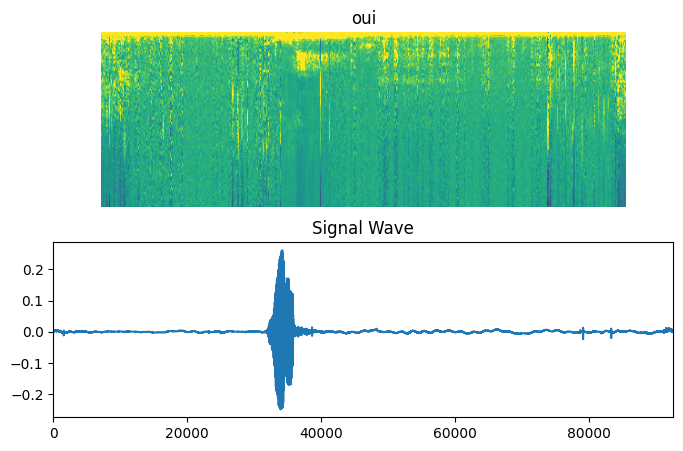

In [71]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    print(label)
    # Spectrogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    # Wav
    file = tf.io.read_file(wavs_path + list(df_train["wav"])[0])
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

In [16]:
def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [17]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # Model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

In [64]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    print("results")
    print(results)
    output_text = []
    print("output_text")
    print(output_text)
    for result in results:
        print("result")
        print(result)
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

def decode_predictions(pred):
    input_len = np.ones(pred.shape[0])
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    print("results")
    print(results)
    output_text = []
    print("output_text")
    print(output_text)
    for result in results:
        print("result")
        print(result)
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)

In [19]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 193), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [20]:
# Define the number of epochs.
epochs = 20
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset)
metric = 'val_accuracy'

checkpoint_filepath = 'C://Users//trist//PycharmProjects//AudioMNIST//Saved_Model_OPEN_SLR//my_best_model.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor=metric,
    mode='max',
    save_best_only=True)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
)


Epoch 1/20
1/1 [==============================] - 0s 114ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    : non
Prediction: 
----------------------------------------------------------------------------------------------------
Target    : volontiers
Prediction: 
----------------------------------------------------------------------------------------------------
321/321 [==============================] - 587s 2s/step - loss: 32.5798 - val_loss: 24.3371
Epoch 2/20
1/1 [==============================] - 0s 112ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    : salut
Prediction: 
------------------------------

In [21]:
model.save_weights('C://Users//trist//PycharmProjects//AudioMNIST//Saved_Model_OPEN_SLR//my_best_model.hdf5')
checkpoint_filepath = 'C://Users//trist//PycharmProjects//AudioMNIST//Saved_Model_OPEN_SLR//my_best_model.hdf5'
model.load_weights(checkpoint_filepath)


In [49]:
## PARTIE VALIDATION PRÉDICTION
# on recharge les poids du model ainsi qu'une ou plusieurs donnée jamais vu pour voir si le model arrive à re transcrire
model.load_weights(checkpoint_filepath)

In [50]:
print(os.getcwd())
#C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\wav_one_word
os.chdir("C://Users//trist//PycharmProjects//AudioMNIST//Open_SLR_data//wav_one_word_16_bits_validation")
print(os.getcwd())

wav_files = [f for f in os.listdir(os.getcwd())]
print(wav_files)

C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt_one_word_validation
C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\wav_one_word_16_bits_validation
['M19_a4_s024_v03.wav']


In [51]:
os.chdir("C://Users//trist/PycharmProjects//AudioMNIST//Open_SLR_data//txt_one_word_validation")
print(os.getcwd())

txt_files = [f for f in os.listdir(os.getcwd())]
print(txt_files)
wav_labels = []
for txt in txt_files:
    myfile = open(txt, "rt", encoding="utf-8")  # open lorem.txt for reading text
    text = myfile.read()
    text = text.replace("é", "e")
    wav_labels.append(text)  # read the entire file to string
    myfile.close()  # close the file
print(wav_labels)  # print string contentsm

C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt_one_word_validation
['M19_a4_s024_v03.txt']
['assurement']


In [52]:
## put that in pandas DF
data_wav = {'wav': wav_files, 'labels': wav_labels}
df_one_word = pd.DataFrame(data=data_wav)
df_one_word

,wav,labels
0,M19_a4_s024_v03.wav,assurement


In [53]:
df_val = df_one_word.copy()

print(f"Size of the validation set: {len(df_val)}")
df_val

Size of the validation set: 1


,wav,labels
0,M19_a4_s024_v03.wav,assurement


In [54]:
batch_size = 1
# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["wav"]), list(df_val["labels"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

Tensor("StringLower:0", shape=(), dtype=string)
Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string)
Tensor("string_lookup/Identity:0", shape=(None,), dtype=int64)


In [55]:
pred = model.predict(train_dataset)


321/321 [==============================] - 35s 108ms/step


In [84]:
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)

1/1 [==============================] - 0s 413ms/step
results
tf.Tensor(
[[19  1 12 ... -1 -1 -1]
 [19  1 12 ... -1 -1 -1]
 [19  1 12 ... -1 -1 -1]
 ...
 [ 2 15 14 ... -1 -1 -1]
 [ 2 15 14 ... -1 -1 -1]
 [ 2 15 14 ... -1 -1 -1]], shape=(10, 434), dtype=int64)
output_text
[]
result
tf.Tensor(
[19  1 12 21 20 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

# https://keras.io/examples/audio/ctc_asr/

In [85]:
validation_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 193), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>